<a href="https://colab.research.google.com/github/yl540016/PortfolioProjects/blob/main/E_Commerce_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail Sales Data Analysis

# Introduction


In the retail industry, using data analysis can help attract and keep customers, improve operational efficiency, and boost sales and engagement. Retail companies are moving past the initial excitement and are now applying advanced analytics for better understanding their customers and improving forecasts, which leads to faster and more effective results. Since resources are limited, it's essential for companies to identify and focus on key customers to gain their loyalty and enhance overall business performance.

Considering these factors, in this project the objective is to predict the likelihood of customers making purchases in the following month.

# Data Overview

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('./data.csv')

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Just by looking at first 10 rows of the dataset, it helps us to understand the structure and datatypes in our dataset. We can observe that we need to deal with timeseries data, integers and floats, categorical and text data.

In [68]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


For the Quantity and UnitPrice columns, we can see some negative values. We need to check this point.

In [71]:
df[df['Quantity'] < 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [12]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In cases where the 'quantity' column is negative, the 'InvoiceNo' starts with a 'C', indicating that the order has been canceled.

In [72]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


There are only two instances where the 'UnitPrice' column is negative. Additionally, these records lack a 'CustomerID' and, considering the descriptions, they will be removed for analysis purposes.

In [73]:
# Filter the DataFrame to exclude rows where 'UnitPrice' is less than 0
df = df[df['UnitPrice'] >= 0]


In [10]:
df.shape

(541909, 8)

# Preprocessing data

In [74]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-74-1f26bb90d392>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Missing Values

In [27]:
nullTable = pd.DataFrame(df.dtypes, columns=["types"]).T
null_count = pd.DataFrame(df.isnull().sum(), columns=["count"]).T
null_percentage = pd.DataFrame((df.isnull().sum() / df.shape[0] * 100), columns=["%"]).T
nullTable = pd.concat([nullTable, null_count, null_percentage])
nullTable

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
types,object,object,object,int64,object,float64,float64,object
count,0,0,1454,0,0,0,135080,0
%,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [98]:
pd.DataFrame(df.isnull().sum()).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total Revenue
0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
df.dropna(axis= 0, subset=['CustomerID'], inplace=True)

# Dealing with Duplicates

In [22]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 5268 duplicates in the dataset.


Let's remove these duplicates

In [75]:
df.drop_duplicates(inplace=True)

In [22]:
# Check whether duplicates are removed
df.duplicated().sum()

0

In [18]:
df.duplicated().sum()

5268

# Outliers

In this project, I will employ basic approach to handle outliers by eliminating data points that greatly differ from the mean and standard deviation of a column.

First, let's caculate the mean and standard deviation of the column Quantity and UnitPrice.

In [77]:
qty_mean = df['Quantity'].mean()
qty_std = df['Quantity'].std()
price_mean = df['UnitPrice'].mean()
price_std = df['UnitPrice'].std()

In [80]:
qty_mean, qty_std

(12.183272576966365, 250.28303714445406)

In [81]:
price_mean, price_std

(3.4740636398043865, 69.76403506410989)

In [82]:
df = df[(abs(df['Quantity'] - qty_mean) <= 3 * qty_std) &
                 (abs(df['UnitPrice'] - price_mean) <= 4 * price_std)]

I conducted similar procedures on the ‘UnitPrice’ column, subsequently removing 0.5% of the data based on this criterion.”

# **Data Analysis**

Now that we've completed the data preprocessing, let's move on to data analysis.

<ipython-input-85-affc09d84c07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year


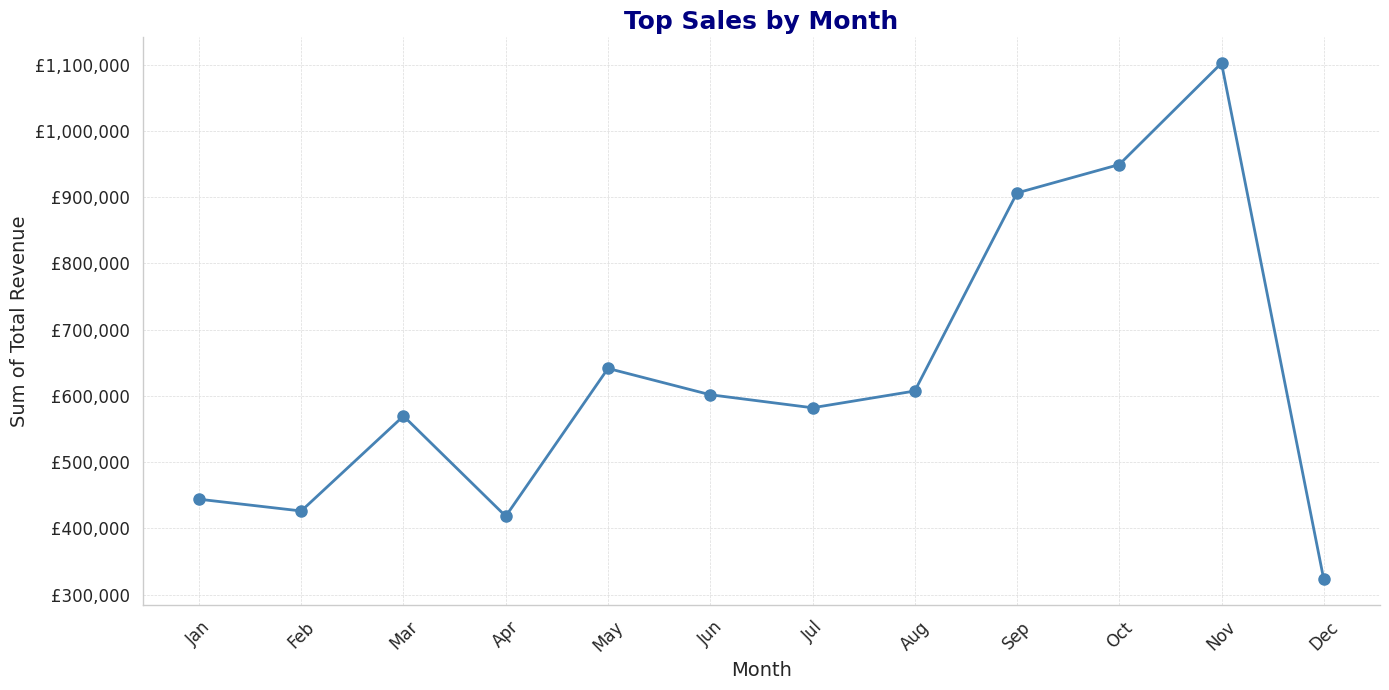

In [85]:
sns.set_style("whitegrid")

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['InvoiceDate'].dt.strftime('%Y-%m') != '2010-12']

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name().str.slice(stop=3)
df['Total Revenue'] = df['Quantity'] * df['UnitPrice']

monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=months, ordered=True)
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])


plt.figure(figsize=(14,7))
plt.plot(monthly_sales['Month'], monthly_sales['Total Revenue'], marker='o', markersize=8, linestyle='-', linewidth=2, color='steelblue')
plt.title('Top Sales by Month', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sum of Total Revenue', fontsize=14)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('£{x:,.0f}'))

plt.xticks(ticks=range(len(months)), labels=monthly_sales['Month'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


From this graph, it can be observed that September emerged as the peak month, generating £906,302 in sales. Additionally, December recorded the lowest sales of the year at £322,983.

## Most Popular Products

To identify the 10 most popular products, the sum of the quantity for each product was compared.

<ipython-input-62-72a097539e22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette=palette)


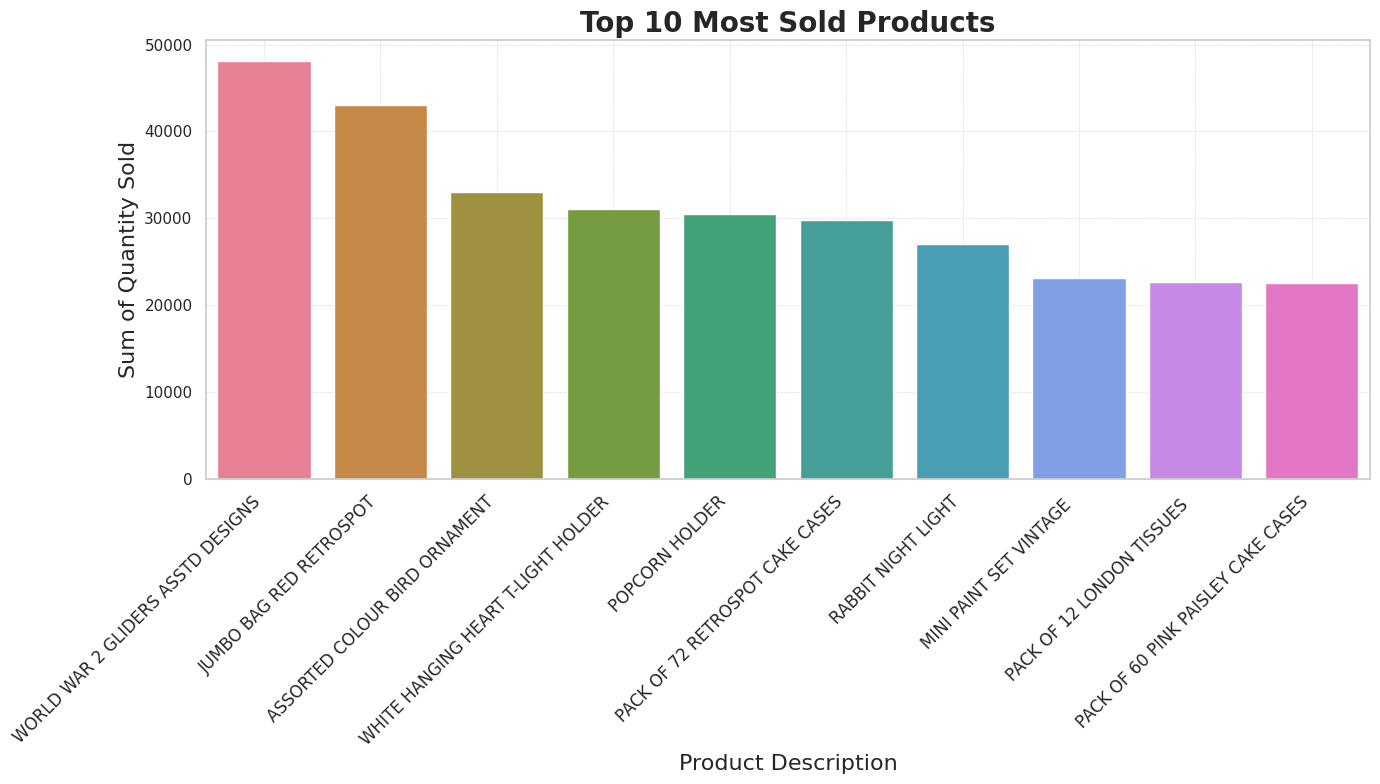

In [62]:
sns.set(style="whitegrid")

product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", len(product_sales))
sns.barplot(x=product_sales.index, y=product_sales.values, palette=palette)

plt.title('Top 10 Most Sold Products', fontsize=20, fontweight='bold')
plt.xlabel('Product Description', fontsize=16)
plt.ylabel('Sum of Quantity Sold', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Most Returned Products

<ipython-input-63-babf939ce236>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_products.index, y=cancelled_products.values, palette="vlag")


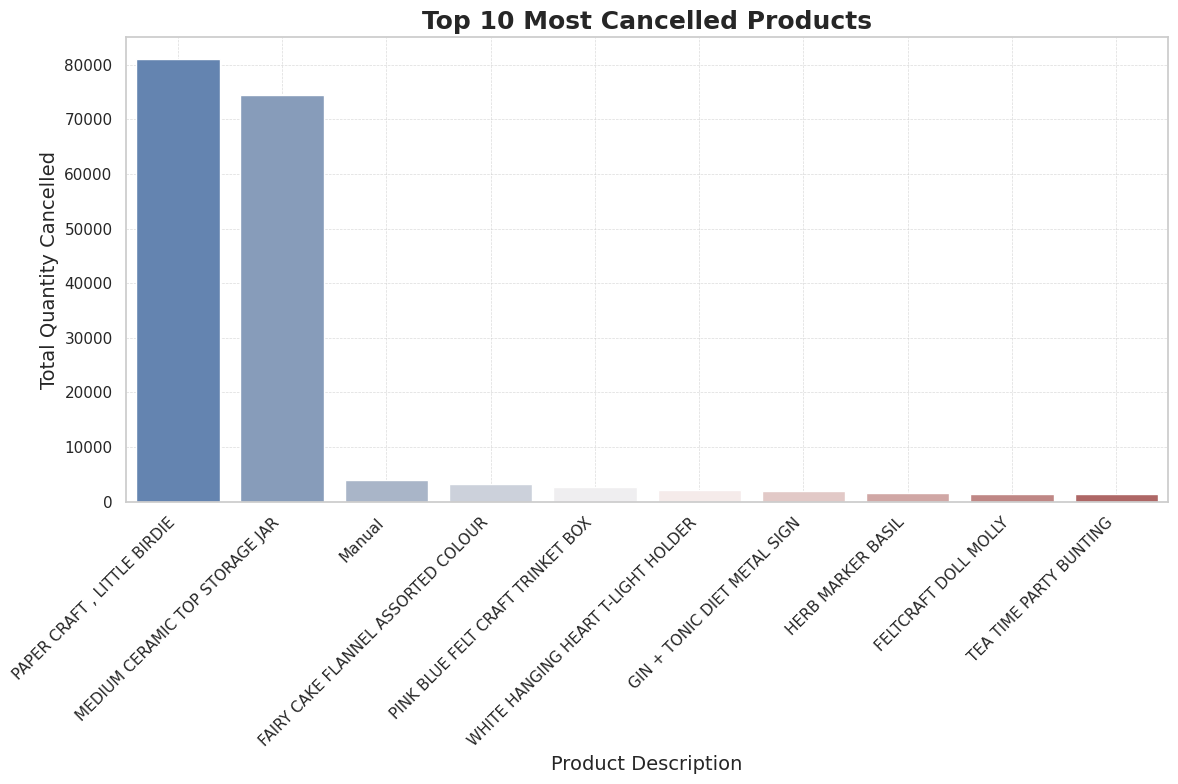

In [63]:
sns.set_style("whitegrid")

cancellations = df[df['Quantity'] < 0]

cancelled_products = cancellations.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=cancelled_products.index, y=cancelled_products.values, palette="vlag")

plt.title('Top 10 Most Cancelled Products', fontsize=18, fontweight='bold')
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Total Quantity Cancelled', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Using the same method, we identified the 10 most cancelled products. In the case of PAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR, there are an extreme number of cancellations, which suggests that these items require a more detailed examination.

## Number of Transactions per Country

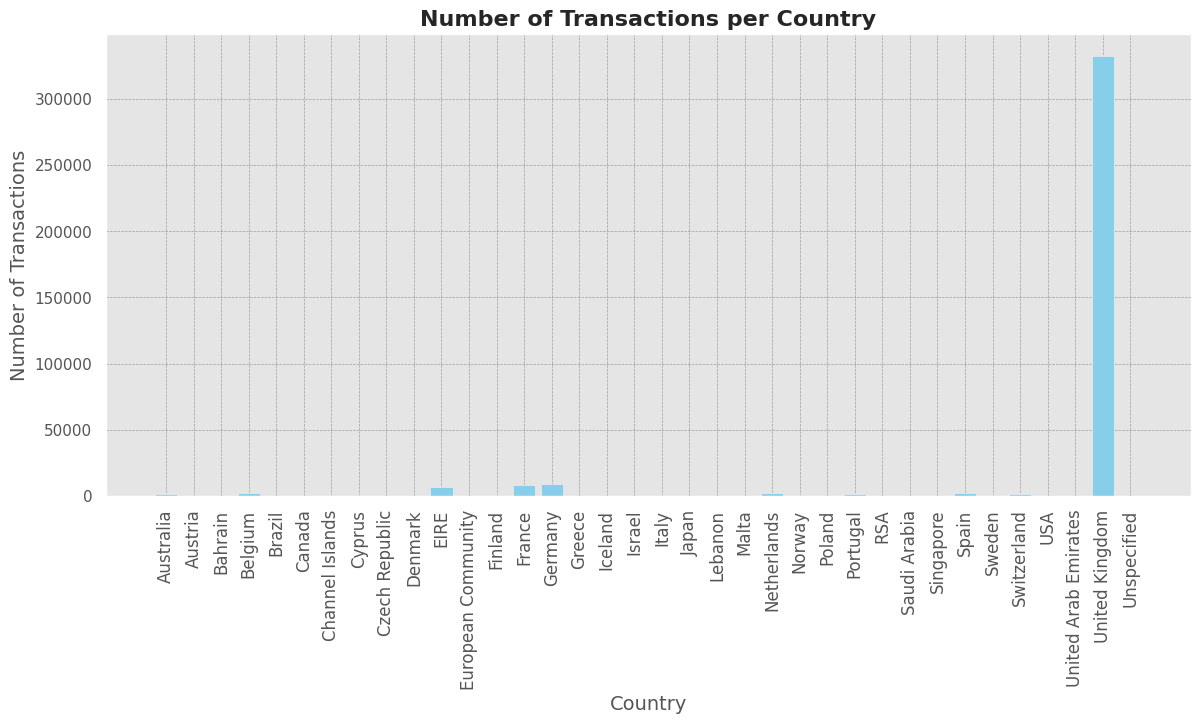

In [91]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(14, 6))

country_data = df.groupby('Country')['CustomerID'].count()

ax.bar(country_data.index, country_data.values, color='skyblue')

ax.set_title("Number of Transactions per Country", fontsize=16, fontweight='bold')
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Number of Transactions", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
ax.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


Out of a total of 374,954 transactions, the United Kingdom accounts for 332,456, which is 88.67% of the total.

In [93]:
total_count = country_data.sum()

# Calculate the UK's count
uk_count = country_data['United Kingdom']

# Calculate the UK's percentage of the total
uk_percentage = (uk_count / total_count) * 100

print(f"Percentage of the UK: {uk_percentage:.2f}%")

Percentage of the UK: 88.67%


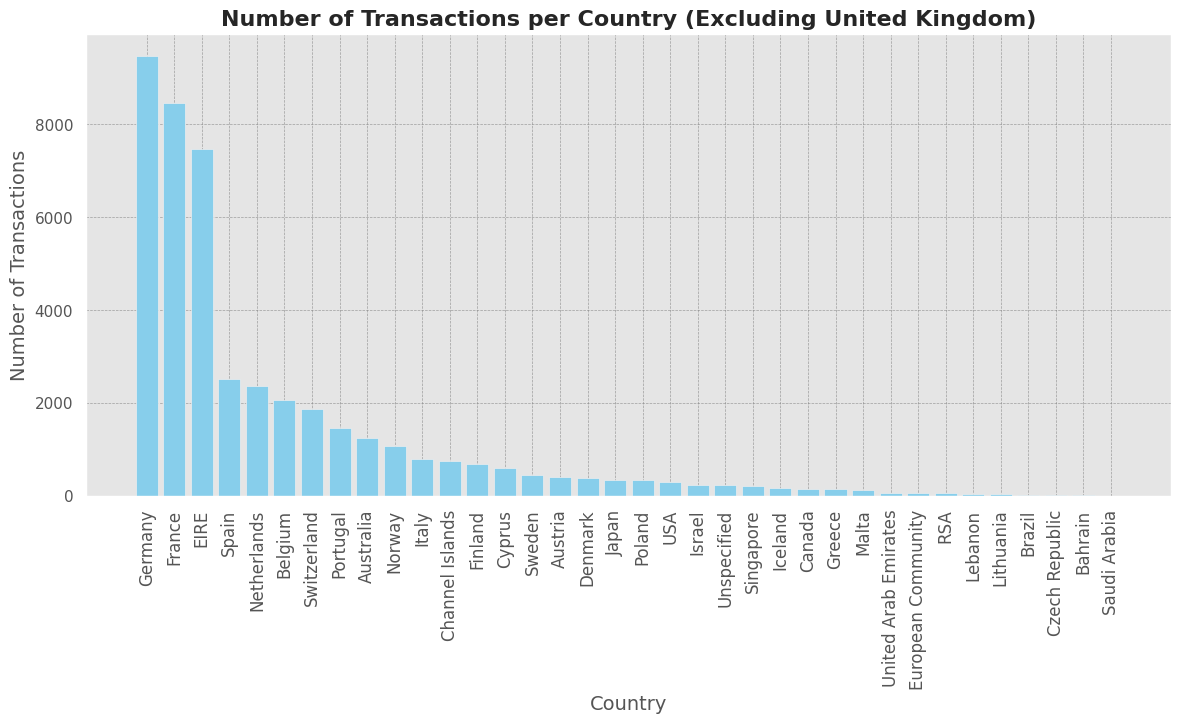

In [84]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(14, 6))
filtered_df = df[df['Country'] != 'United Kingdom']
country_data = filtered_df.groupby('Country')['CustomerID'].count().sort_values(ascending=False)

ax.bar(country_data.index, country_data.values, color='skyblue')
ax.set_title("Number of Transactions per Country (Excluding United Kingdom)", fontsize=16, fontweight='bold')
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Number of Transactions", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
ax.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

## Houlry Sales Analysis

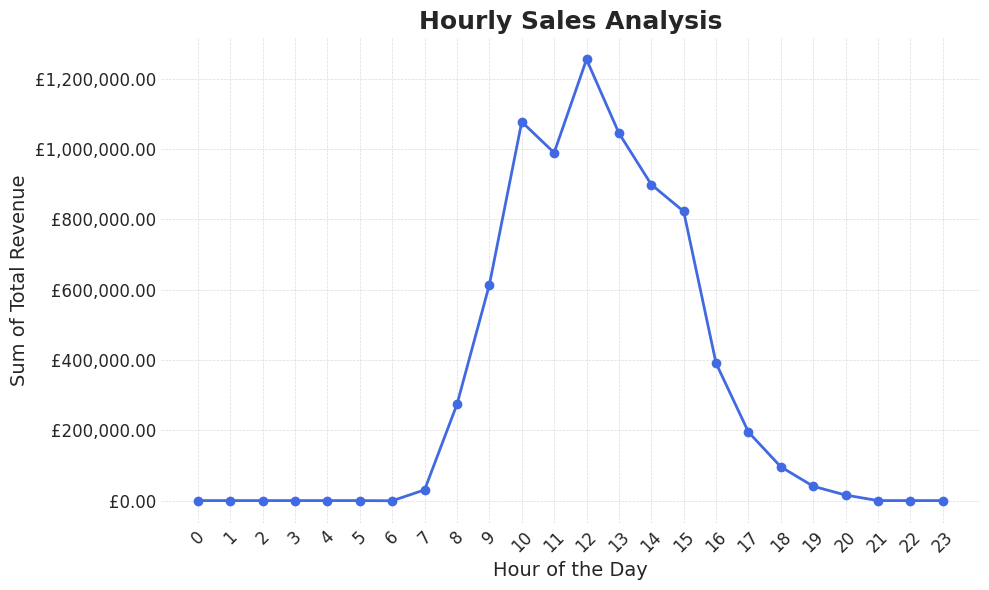

In [48]:
sns.set_style("whitegrid")

# Assuming 'df' is your pandas DataFrame

# Convert 'InvoiceDate' to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the hour from 'InvoiceDate'
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate 'Total Revenue' for each transaction
df['Total Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by 'Hour' and sum 'Total Revenue'
hourly_sales = df.groupby('Hour')['Total Revenue'].sum()

# Ensure all hours are represented, even if there are no sales
all_hours = range(24)
hourly_sales = hourly_sales.reindex(all_hours, fill_value=0)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', linewidth=2, color='royalblue')

# Add titles and labels
plt.title('Hourly Sales Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Sum of Total Revenue', fontsize=14)

# Format y-axis to show currency and add thousands separator
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('£{x:,.2f}'))

# Set x-axis to show all hours
plt.xticks(ticks=all_hours, labels=[f'{hour}' for hour in all_hours], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show grid lines for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout to adjust for the figure size
plt.tight_layout()

# Show the plot
plt.show()


This analysis aims to identify peak sales by hours and to optimize advertisement timing for increased awareness. Sales peak around 12 PM, with £1255105 in revenue. This indicates a significant increase in consumer activity during the lunch hour. The lowest sales occur at 8 PM, generating £15719.

## Suggestions for the Business

Based on the analysis, we can consider the following suggestions for more effective sales.

- Sales records are almost non-existent between 8 PM and 6 AM, indicating possible issues with data logging or the need to check for platform functionality during these hours.
- With the United Kingdom making up 88.67% of sales, strengthening engagement with UK customers is key, while also crafting strategies to elevate sales in other countries.
- To reduce the volume of product cancellations, it's critical to pinpoint any issues related to order cancellations, particularly for the top 2 products that experienced excessively high rates of cancellation.
- Our analysis revealed that the revenue generated by the online retail store is highly seasonal, with peak revenue occurring in November. Consideration should be given to marketing strategies aimed at boosting sales during the holiday season in December and at the start of the year in January.

Reference
data source: https://archive.ics.uci.edu/dataset/352/online+retail